#**Libraries importation**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import numpy as np
import pandas as pd

#**Data importation**


In [2]:
#add your drive path to import the dataset
path = "/content/drive/My Drive/Colab Notebooks/corona/"
print(path +"train")

/content/drive/My Drive/Colab Notebooks/corona/train


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#creating path variables for every set
img_size = [150 ,150]
train_path = path+'train'
test_path = path+'test'
val_path = path+'val'


In [5]:
#getting every set training, validation and test
labels = ['corona', 'normal']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir,label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)
train = get_training_data(path+'train')
test = get_training_data(path+'test')
val = get_training_data(path+'val')
print(train.shape)
print(test.shape)
print(val.shape)



(244, 2)
(20, 2)
(20, 2)


#**Visualisation de Dataset**





/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


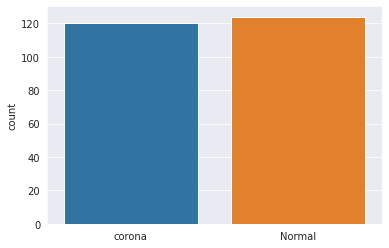

In [6]:
#visualizing the traing set data
l = []
for i in train:
    if(i[1] == 0):
        l.append("corona")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'normal')

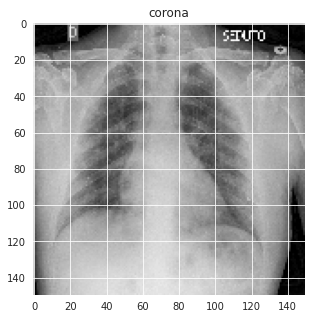

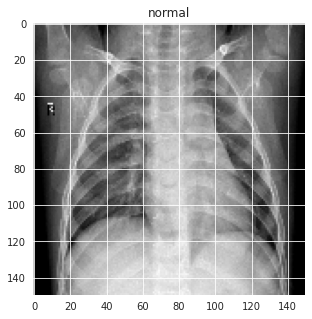

In [8]:
#visualizing x-rays from both classes
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


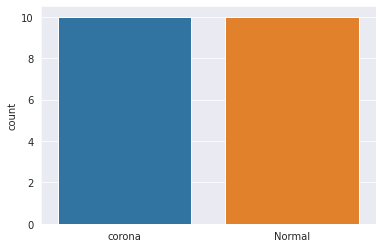

In [9]:
#visulizing test set data
l = []
for i in test:
    if(i[1] == 0):
        l.append("corona")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'normal')

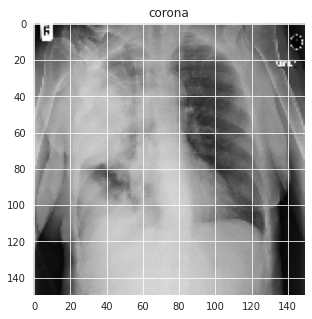

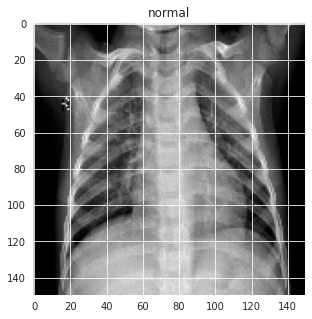

In [10]:
plt.figure(figsize = (5,5))
plt.imshow(test[0][0], cmap='gray')
plt.title(labels[val[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(test[-1][0], cmap='gray')
plt.title(labels[test[-1][1]])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


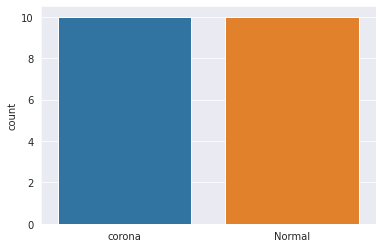

In [11]:
#visualizing the validation set
l = []
for i in val:
    if(i[1] == 0):
        l.append("corona")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'normal')

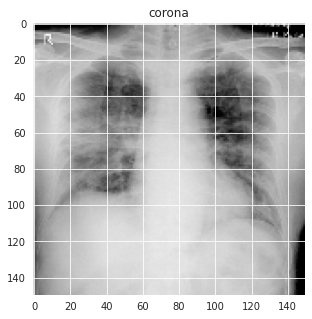

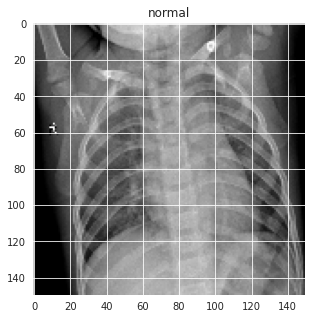

In [12]:
plt.figure(figsize = (5,5))
plt.imshow(val[0][0], cmap='gray')
plt.title(labels[val[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(val[-1][0], cmap='gray')
plt.title(labels[val[-1][1]])